In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input/dataset1")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "all_trips_v2.csv"

In [2]:
library(tidyverse)
library(conflicted)
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")
library(ggplot2)
library(knitr)
library(markdown)

all_trips_v3 <-read.csv("/kaggle/input/dataset1/all_trips_v2.csv",encoding="UTF-8")



[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


In [3]:
class(all_trips_v3)
head(all_trips_v3)
glimpse(all_trips_v3)


[1] "data.frame"

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,date,month,day,year,day_of_week,ride_length
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
1,21742443,2019-01-01 0:04,2019-01-01 0:11,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,member,2019-01-01,1,1,2019,Tuesday,420
2,21742444,2019-01-01 0:08,2019-01-01 0:15,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),member,2019-01-01,1,1,2019,Tuesday,420
3,21742445,2019-01-01 0:13,2019-01-01 0:27,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),member,2019-01-01,1,1,2019,Tuesday,840
4,21742446,2019-01-01 0:13,2019-01-01 0:43,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,member,2019-01-01,1,1,2019,Tuesday,1800
5,21742447,2019-01-01 0:14,2019-01-01 0:20,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,member,2019-01-01,1,1,2019,Tuesday,360
6,21742448,2019-01-01 0:15,2019-01-01 0:19,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,member,2019-01-01,1,1,2019,Tuesday,240


Rows: 788,189
Columns: 15
$ ride_id            <chr> "21742443", "21742444", "21742445", "21742446", "21…
$ started_at         <chr> "2019-01-01 0:04", "2019-01-01 0:08", "2019-01-01 0…
$ ended_at           <chr> "2019-01-01 0:11", "2019-01-01 0:15", "2019-01-01 0…
$ rideable_type      <chr> "2167", "4386", "1524", "252", "1170", "2437", "270…
$ start_station_id   <int> 199, 44, 15, 123, 173, 98, 98, 211, 150, 268, 299, …
$ start_station_name <chr> "Wabash Ave & Grand Ave", "State St & Randolph St",…
$ end_station_id     <int> 84, 624, 644, 176, 35, 49, 49, 142, 148, 141, 295, …
$ end_station_name   <chr> "Milwaukee Ave & Grand Ave", "Dearborn St & Van Bur…
$ member_casual      <chr> "member", "member", "member", "member", "member", "…
$ date               <chr> "2019-01-01", "2019-01-01", "2019-01-01", "2019-01-…
$ month              <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ day                <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ year        

In [4]:
# DESCRIPTIVE ANALYSIS : ridership data by member type and weekday:
all_trips_v3 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length), .groups = 'keep') %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,18652,5059.1658
casual,Mon,5591,4750.6028
casual,Tue,7311,4560.9684
casual,Wed,7690,4480.1821
casual,Thu,7147,8450.3456
casual,Fri,8013,6088.8132
casual,Sat,13473,4946.4796
member,Sun,60197,972.0265
member,Mon,110430,822.2059


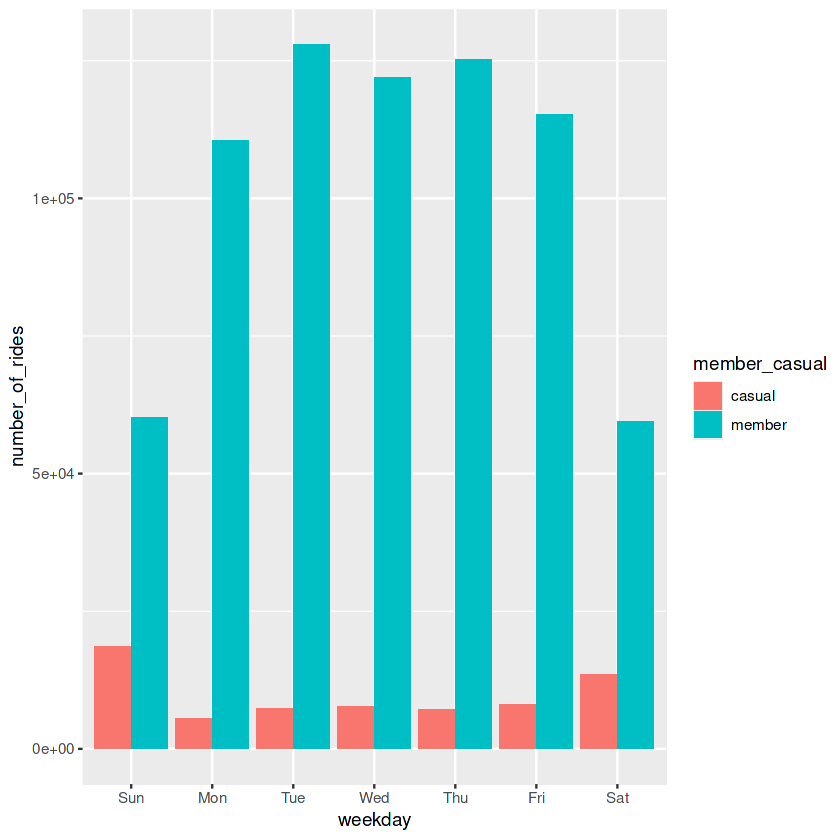

In [5]:
# plot1: visualize the number of rides by rider type and weekday:
all_trips_v3 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length),.groups = 'keep') %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")


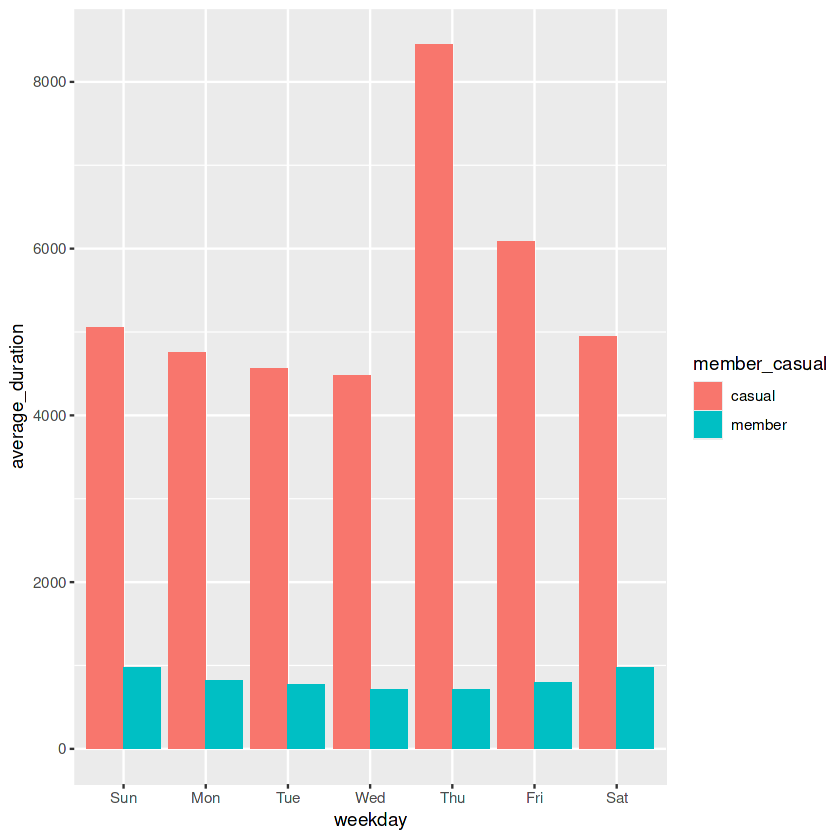

In [10]:
# Plot#2 create a visualization for average duration by ride type:
all_trips_v3 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length),.groups = 'keep') %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")


---
title: "cyclistic-20250801"
author: "Wei , zhangwei9@hotmail.com"
email: "zhangwei9@hotmail.com"
date: "2025-08-01"
---

```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)
library(tidyverse)
library(conflicted)
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")
library(ggplot2)
library(knitr)
library(markdown)


all_trips_v3 <-read.csv("/kaggle/input/dataset1/all_trips_v2.csv",encoding="UTF-8")

```

## DATASETS:

This pulic dataset come from the following link: previous 12 months of Cyclistic trip data. click here [link](https://divvy-tripdata.s3.amazonaws.com/index.html)

## CONDUCT DESCRIPTIVE ANALYSIS

This is an R Markdown document. Markdown is a simple formatting syntax for authoring HTML, PDF, and MS Word documents. For more details on using R Markdown see <http://rmarkdown.rstudio.com>.

# analyze ridership data by type and weekday:



all_trips_v3 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length), .groups = 'keep') %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts


## Including Plots

I can also embed 2 replate plots here.

# Plot#1 visualize the number of rides by rider type:



all_trips_v3 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length),.groups = 'keep') %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")


# Plot#2 create a visualization for average duration by ride type:


all_trips_v3 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length),.groups = 'keep') %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")


## Conclusion: Rider Behavior

### Casual Riders:

* Fewer rides overall, but longer durations;
* Strong preference for weekend riding; 
* Likely using bikes for leisure or one-off trips all the time.

### Member Riders:

* High volume of shorter rides.
* Consistent usage throughout the weekdays 
* Suggests commuting or regular, shorter utility trips

## Suggested Action Plan for Cyclistic

### Target Casual Riders
Develop marketing strategies to convert casual riders to members, focusing on weekend users.

### Promote Membership Benefits
Highlight cost savings for frequent, shorter rides to attract more daily commuters.

### Optimize Bike Availability
Ensure sufficient bike availability during peak casual (weekend) and member (weekday) times.



